# Regression (Linear)

Credit: Kalvin

# Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
plt.style.use(style='fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

# Data Preparation

In [35]:
data = pd.read_csv("Calories.csv")
data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [36]:
data_out = data.pop("Calories")
data["Calories"] = data_out

In [37]:
data = data.drop(columns = ["User_ID"])

In [38]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

#

#EDA

In [39]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [40]:
data.shape

(15000, 8)

In [41]:
data.dtypes

Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

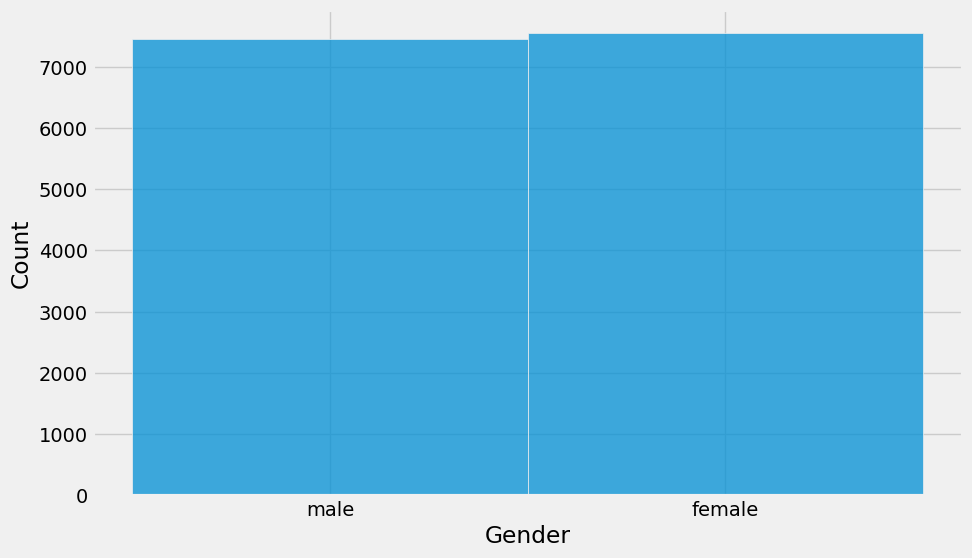

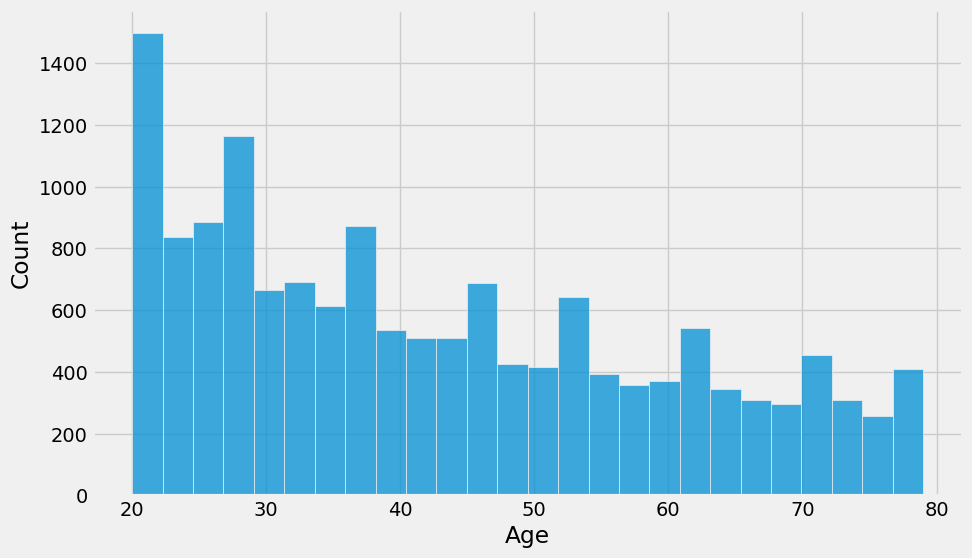

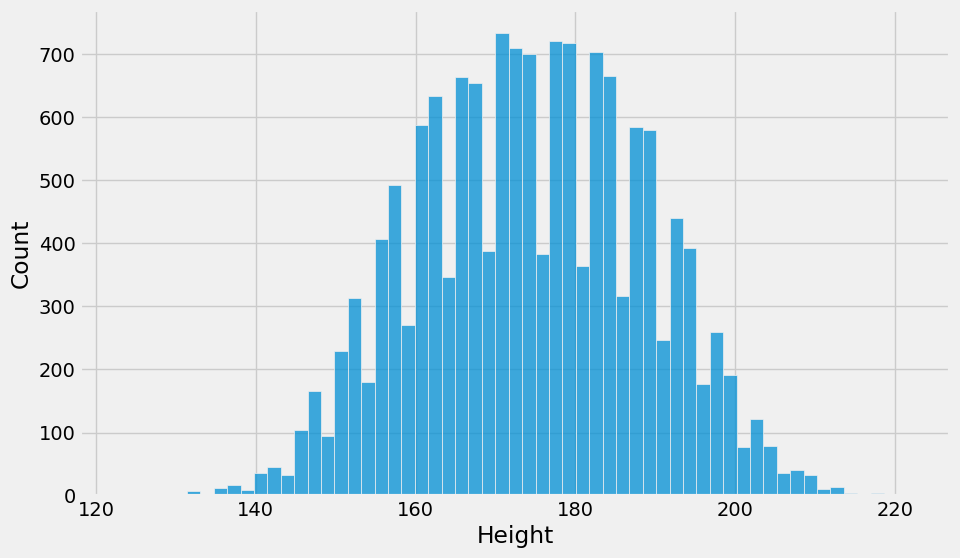

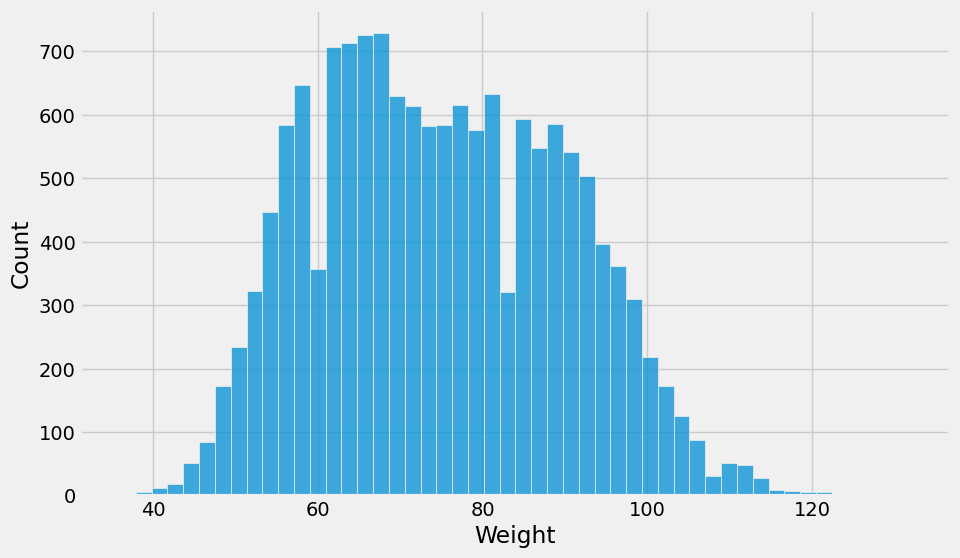

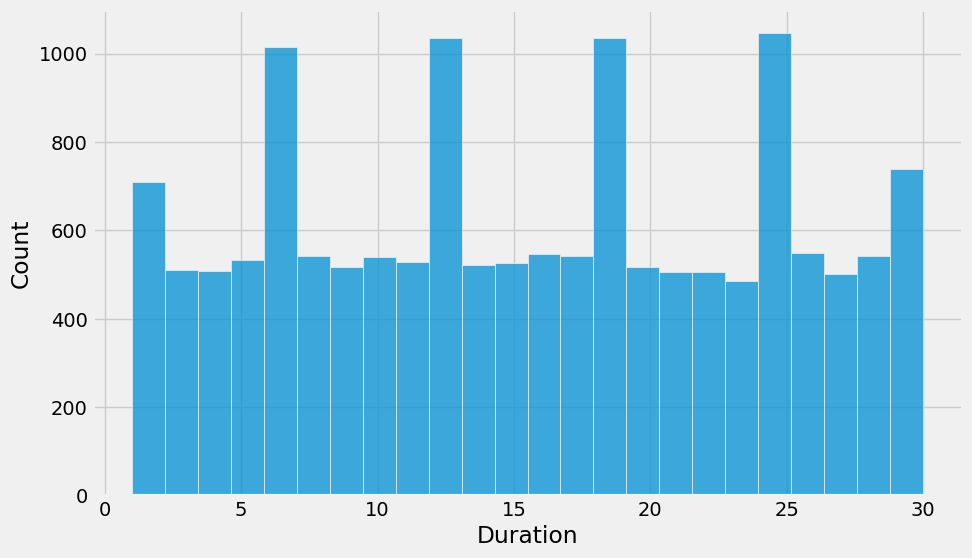

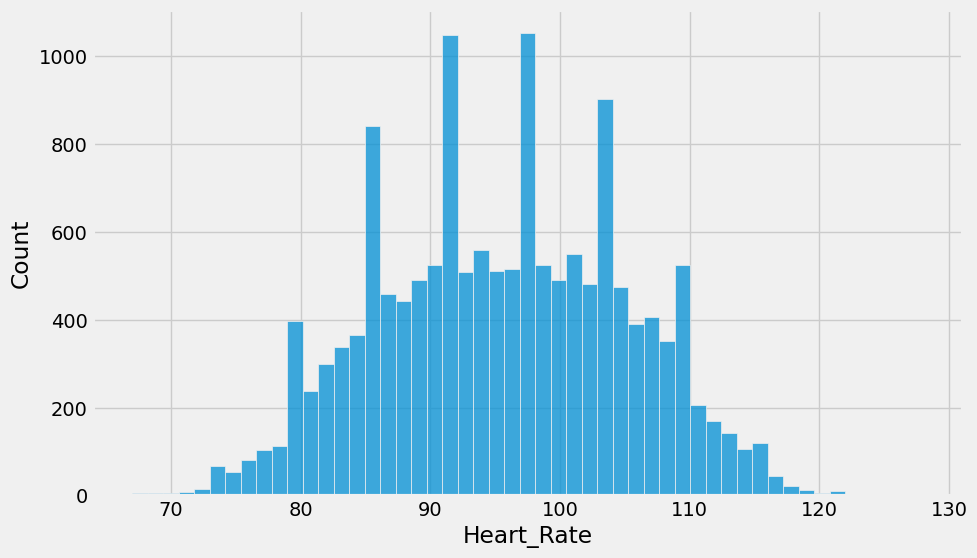

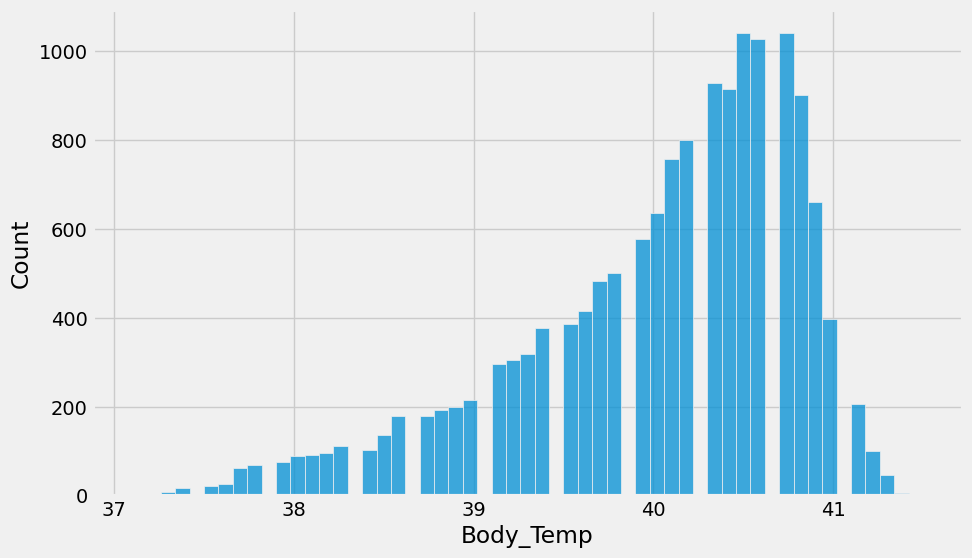

In [42]:
for column in data.columns[:-1] :
  sns.histplot(data = data, x = column)
  plt.show()

Peserta paling banyak yaitu umur 20 - 30 an.
Tinggi dan berat badan memiliki distribusi yang baik.
Body_Temp paling tinggi ada di 40 - 41.

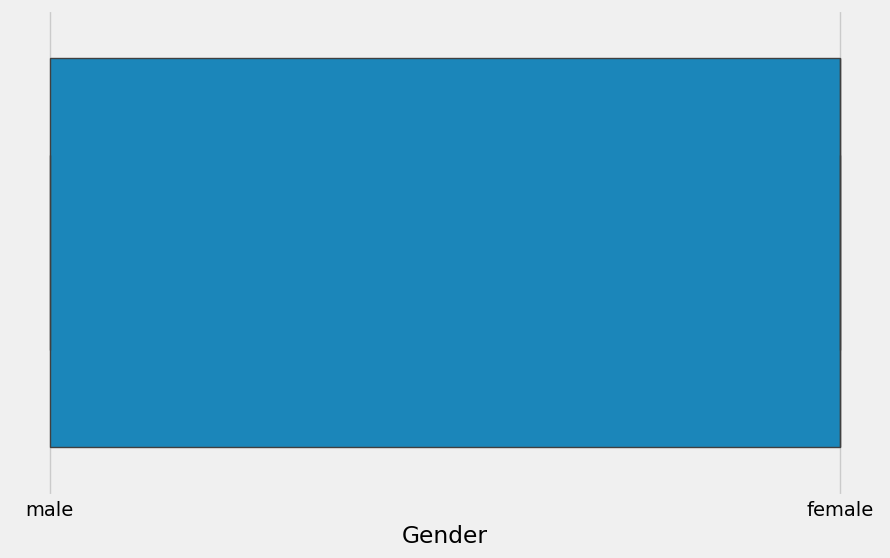

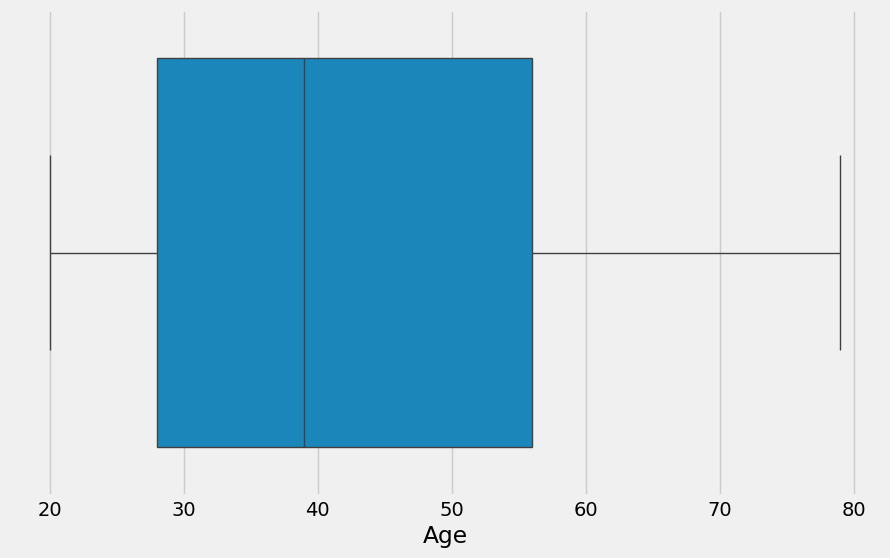

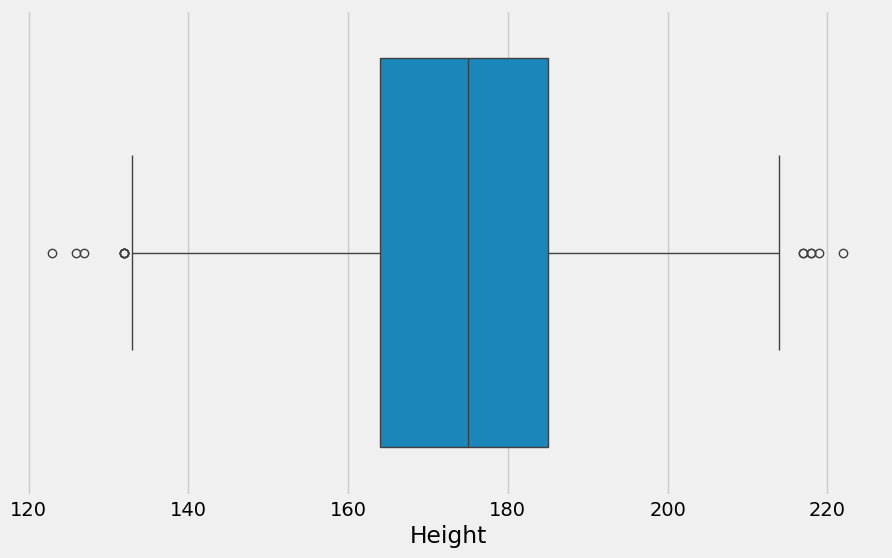

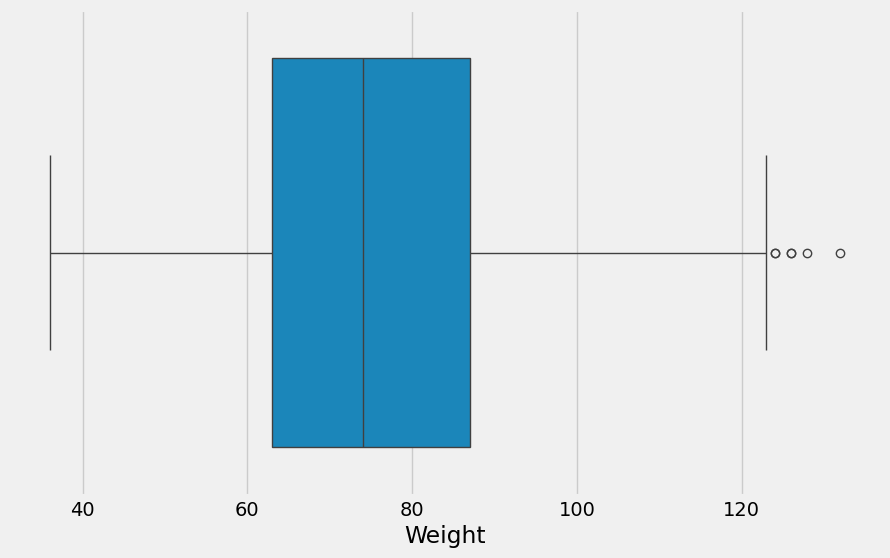

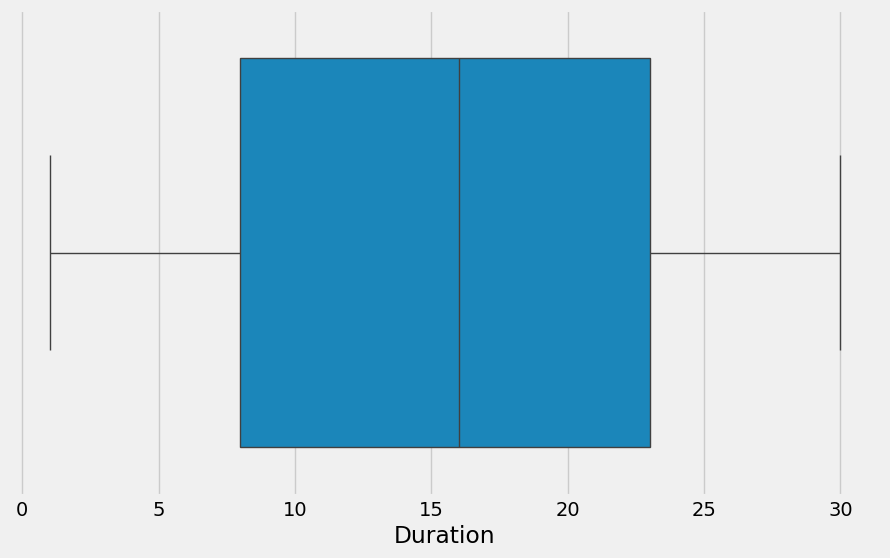

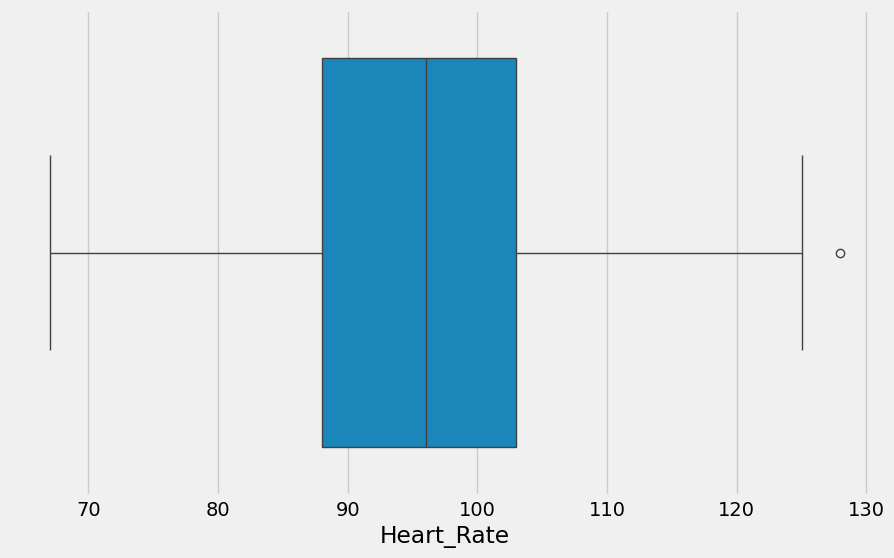

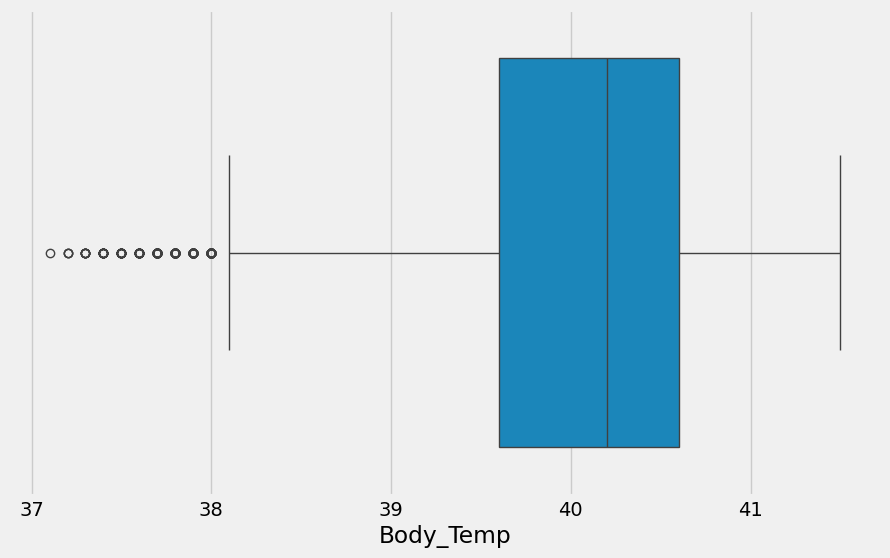

In [43]:
for column in data.columns[:-1] :
  sns.boxplot(data = data, x = column)
  plt.show()

Tidak ada outlier ekstrim, hanya outlier kecil.


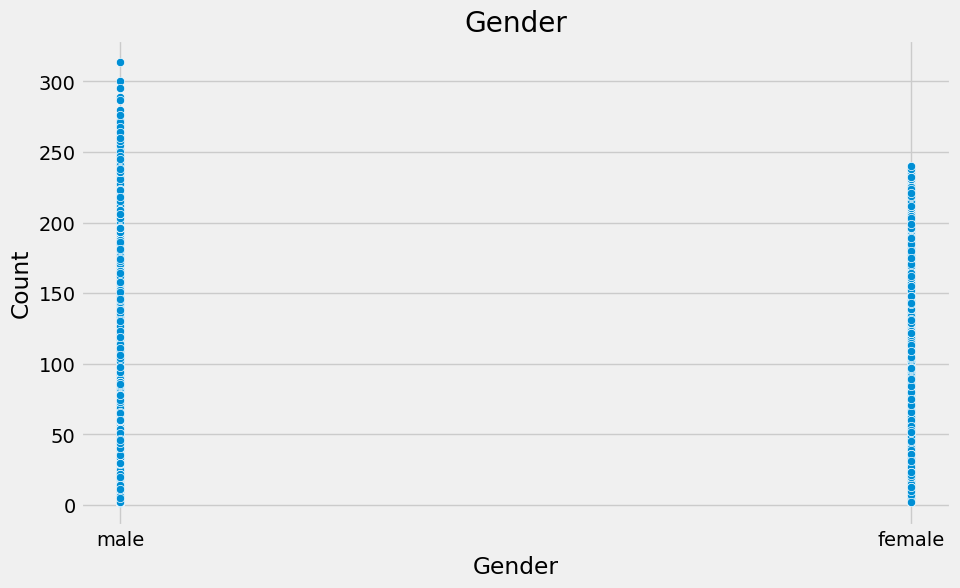

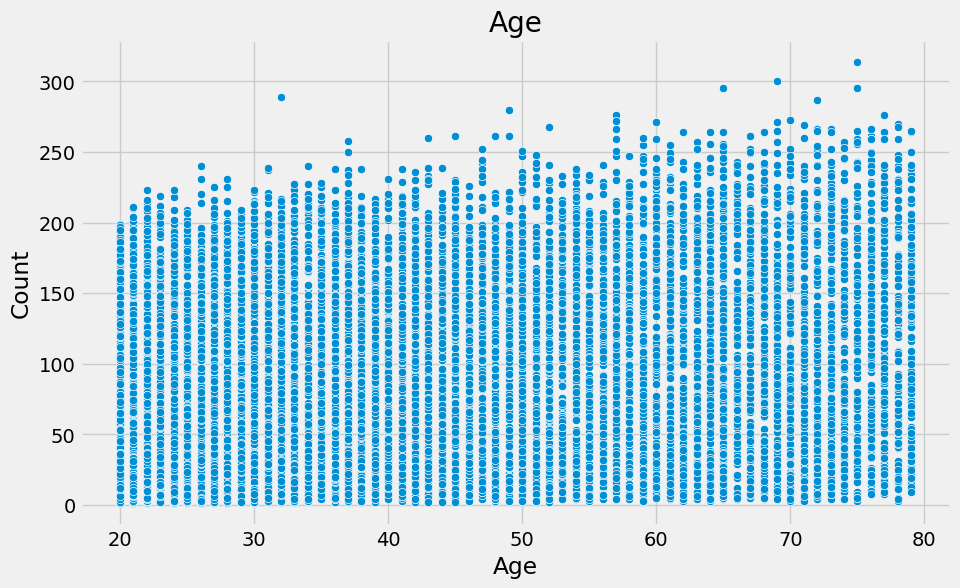

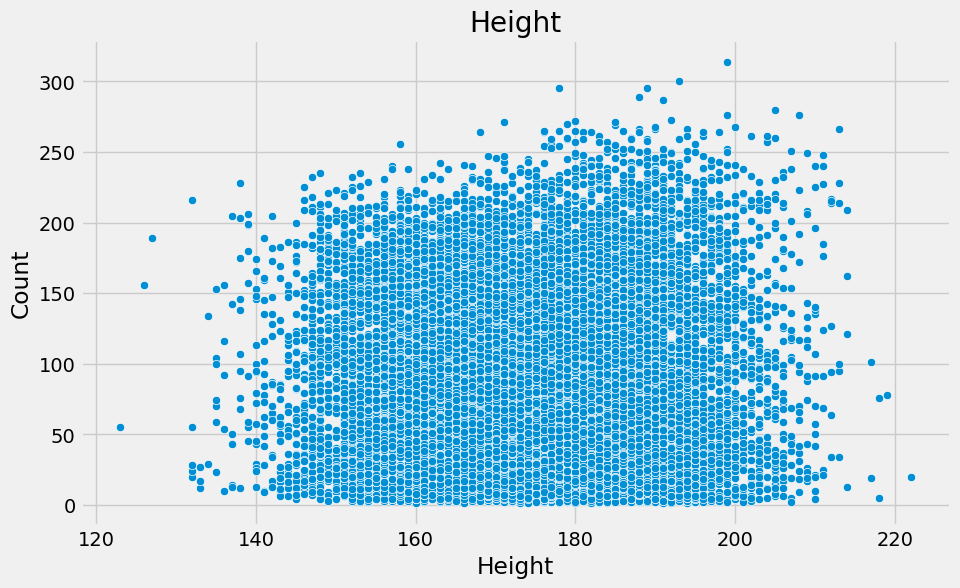

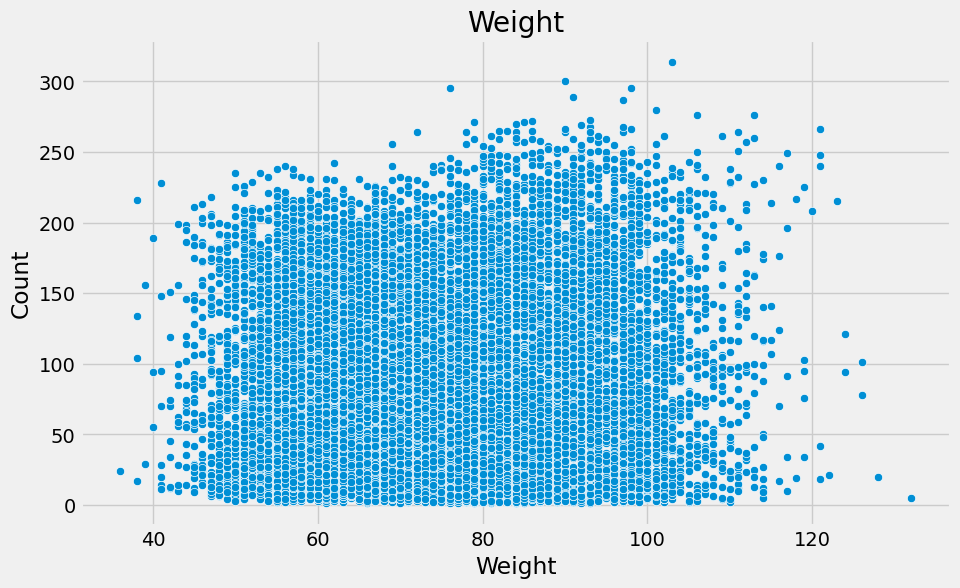

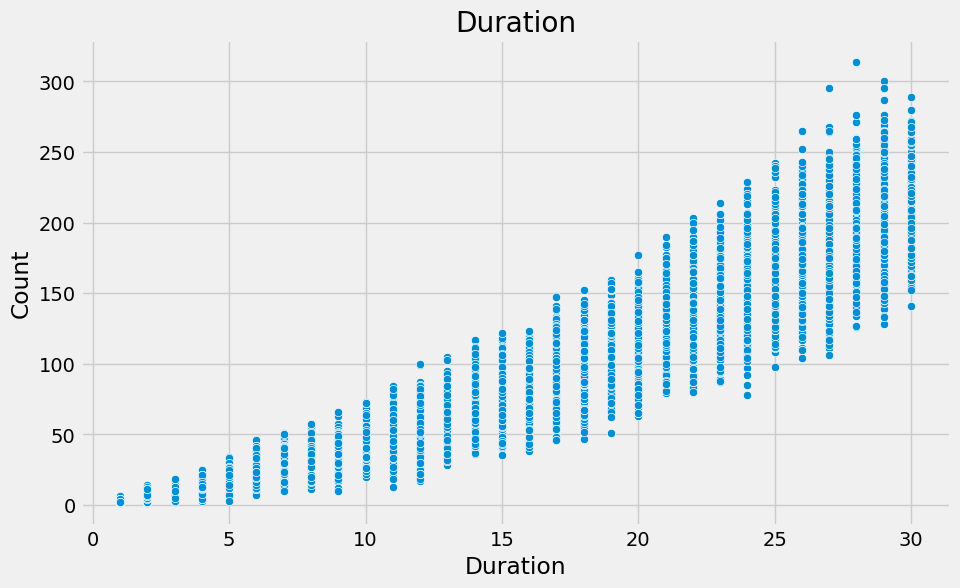

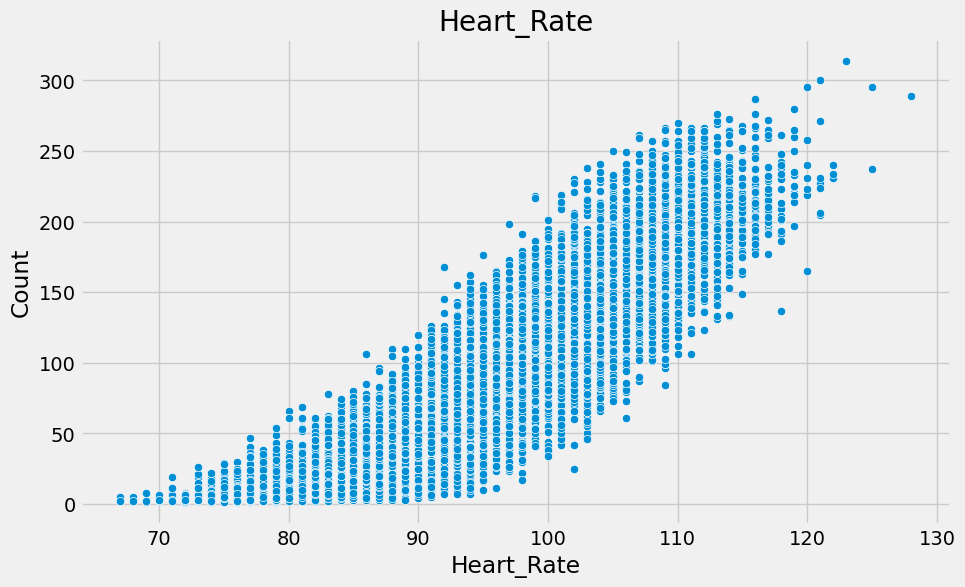

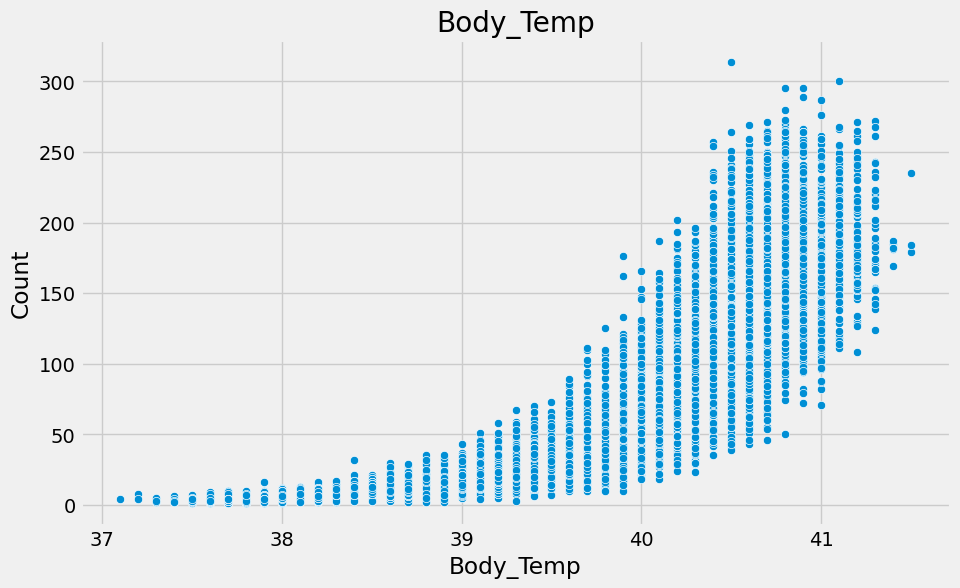

In [44]:
for column in data.columns[:-1] :
  sns.scatterplot(data = data, x = column, y = "Calories")
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.show()

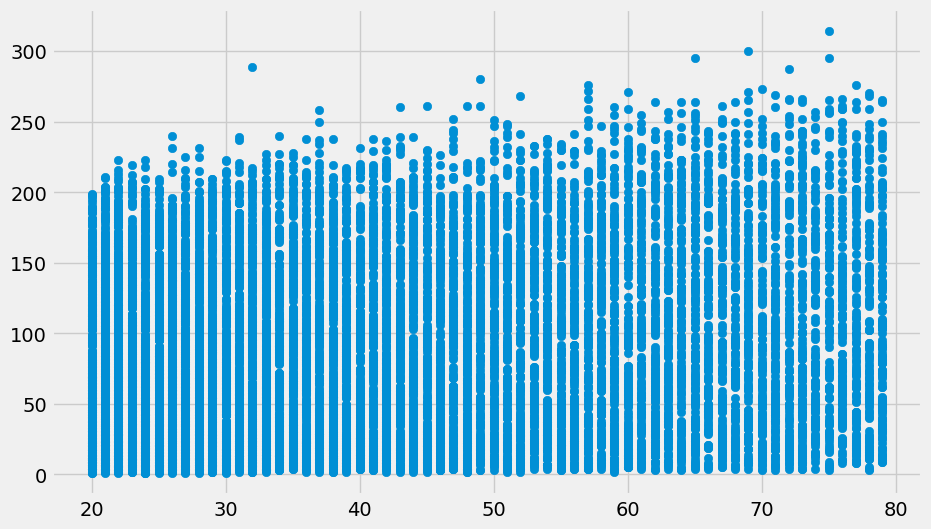

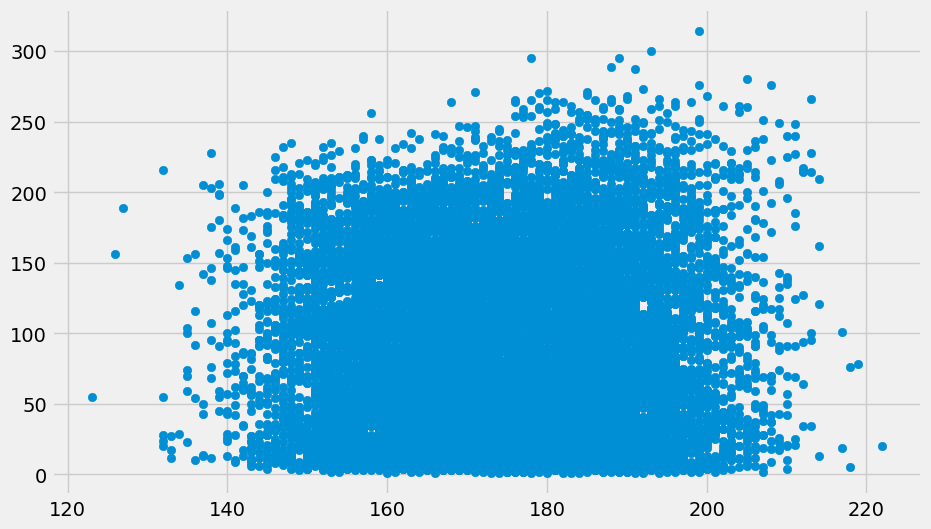

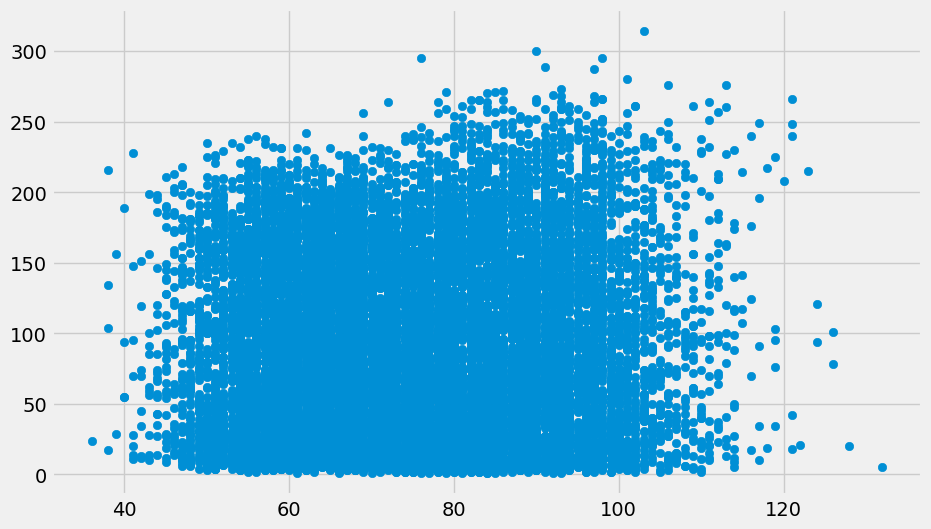

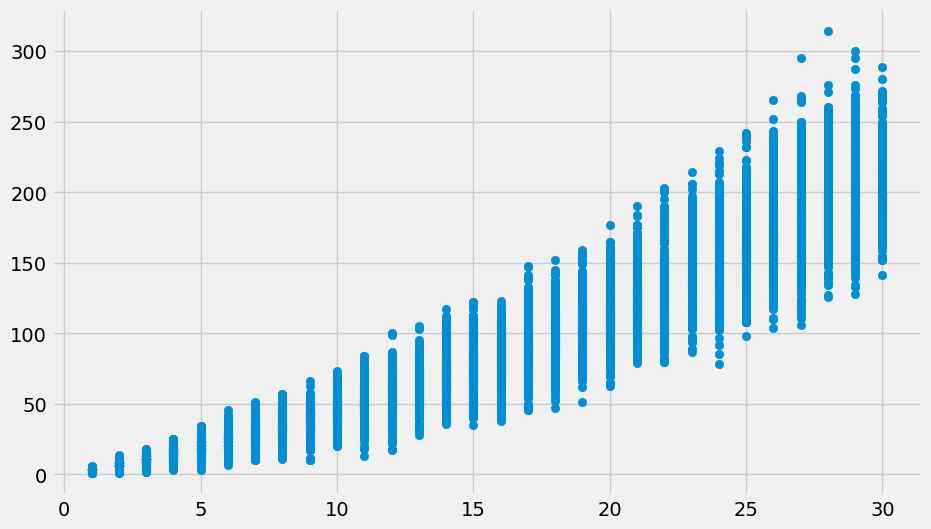

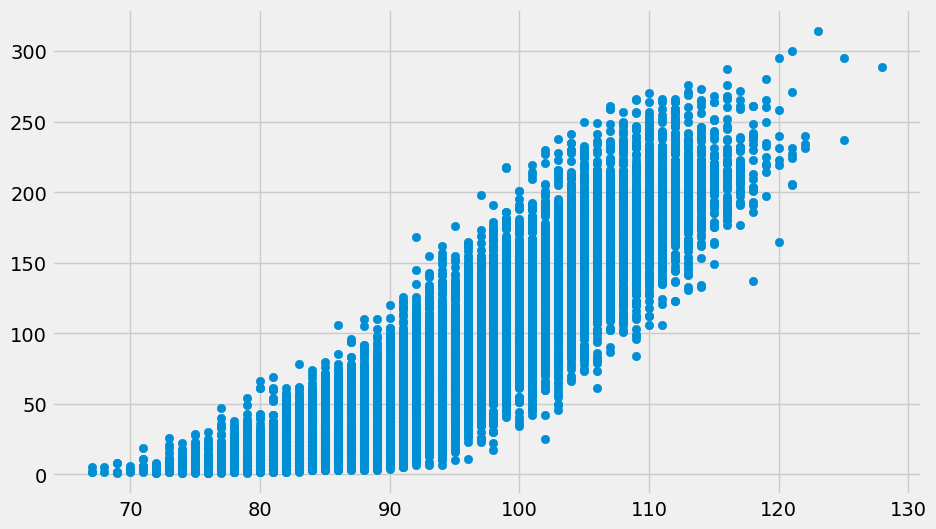

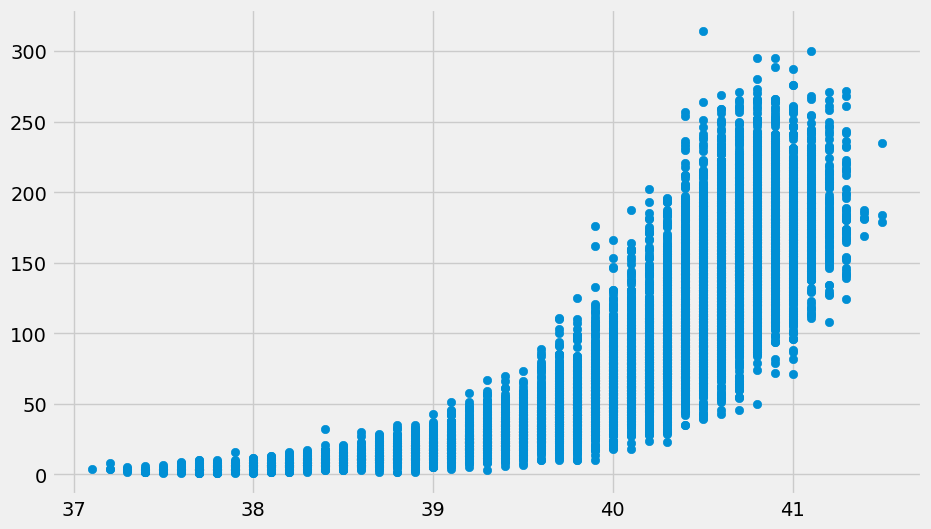

In [45]:
for column in data.columns[:-1]:
    if (data[column].dtypes != "object"):
        plt.scatter(x=data[column] , y=data["Calories"])
        plt.show()

Bisa dilihat, semakin lama durasi olahraganya, maka kalori yang terbakar juga semakin banyak.
Semakin tinggin heart_rate-nya, maka kalori yang terbakar juga semakin banyak.
Semakin naik temperatur tubuh, maka kalori yang dibakar semakin banyak.


In [46]:
for column in data.columns[:-1] :
  if(data[column].dtype != "object") :
    print(f"column : {column}, skew : {data[column].skew()}, kurt : {data[column].kurt()}")

column : Age, skew : 0.47338270096138746, kurt : -0.9491304391648785
column : Height, skew : -0.006189620437893538, kurt : -0.5132103434138231
column : Weight, skew : 0.22672530725814513, kurt : -0.6820567382751981
column : Duration, skew : 0.0047505366680978415, kurt : -1.1847510258856375
column : Heart_Rate, skew : -0.01070407972854895, kurt : -0.6442197983992131
column : Body_Temp, skew : -0.9943824155974582, kurt : 0.5173064087117121


Kolom terdistribusi normal : tidak ada.
kolom tidak terdistribusi normal : semua
(Berarti, untuk menangani missing value-nya menggunakan .median() )

# Feature Engineering

In [47]:
missing_percentage = data.isna().sum() / len(data) * 100
missing_percentage

Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
Duration      0.0
Heart_Rate    0.0
Body_Temp     0.0
Calories      0.0
dtype: float64

In [48]:
for key, value in missing_percentage.items() :
  if(value > 50.0) :
    data = data.drop(columns = [key])

In [49]:
for column in data.columns :
  if(data[column].isna().any()) :
    if(data[column].dtype != "object") :
      data[column] = data[column].fillna(data[column].median())
    else :
      data[column] = data[column].fillna(data[column].mode()[0])

In [50]:
data.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [51]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [52]:
encoder = LabelEncoder()
encoded = {}
for column in data.columns :
  if(data[column].dtype == "object") :
    data[column] = encoder.fit_transform(data[column])
    encoded[column] = {i : class_name for i, class_name in enumerate(encoder.classes_)}

In [53]:
for key, value in encoded.items() : print(f"key : {key}, value : {value}")

key : Gender, value : {0: 'female', 1: 'male'}


In [54]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]
print (x)
print (y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [56]:
def correlation(data_df, threshold) :
  corr_col = set()
  corr_matrix = data_df.corr()
  for i in range(len(corr_matrix.columns)) :
    for j in range(i + 1, len(corr_matrix.columns)) :
      if(np.abs(corr_matrix.iloc[(i, j)]) > threshold) :
        corr_col.add(corr_matrix.columns[j])
  return corr_col

In [57]:
corr_col = correlation(x_train, 0.9)
print(corr_col)

{'Weight', 'Body_Temp'}


In [58]:
x_train = x_train.drop(columns = corr_col, axis = 1)
x_test = x_test.drop(columns = corr_col, axis = 1)

In [59]:
# x_train = x_train.to_numpy()
# x_test = x_test.to_numpy()

In [60]:
model = LinearRegression() #LinearRegression dengan MinMaxScaler()
history = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"RMSE : {root_mean_squared_error(y_test, y_pred)}, MSE : {mean_squared_error(y_test, y_pred)}, R2_SCORE : {r2_score(y_test, y_pred)}")

RMSE : 12.497601572233583, MSE : 156.1900450582953, R2_SCORE : 0.9593038518528517


In [61]:
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [62]:
scaler_x_minmax, scaler_y_minmax = MinMaxScaler(), MinMaxScaler()
scaler_x_standard, scaler_y_standard = StandardScaler(), StandardScaler()

In [63]:
def scaling(x1, x2, y1, y2, scaler_x, scaler_y) :
  x1 = scaler_x.fit_transform(x1)
  x2 = scaler_x.transform(x2)
  y1 = scaler_y.fit_transform(y1)
  y2 = scaler_y.transform(y2)
  return x1, x2, y1, y2, scaler_x, scaler_y

In [64]:
x_train1, x_test1, y_train1, y_test1, scaler_x_minmax, scaler_y_minmax = scaling(x_train, x_test, y_train, y_test, scaler_x_minmax, scaler_y_minmax)

In [65]:
x_train2, x_test2, y_train2, y_test2, scaler_x_standard, scaler_y_standard = scaling(x_train, x_test, y_train, y_test, scaler_x_standard, scaler_y_standard)

In [66]:
model = LinearRegression() #LinearRegression dengan MinMaxScaler()
history = model.fit(x_train1, y_train1)
y_pred = model.predict(x_test1)
print(f"RMSE : {root_mean_squared_error(y_test1, y_pred)}, MSE : {mean_squared_error(y_test1, y_pred)}, R2_SCORE : {r2_score(y_test1, y_pred)}")

RMSE : 0.03992843952790278, MSE : 0.0015942802831333891, R2_SCORE : 0.9593038518528518


In [67]:
model2 = LinearRegression() #LinearRegression dengan StandardScaler()
history2 = model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)
print(f"RMSE : {root_mean_squared_error(y_test2, y_pred2)}, MSE : {mean_squared_error(y_test2, y_pred2)}, R2_SCORE : {r2_score(y_test2, y_pred2)}")

RMSE : 0.19973264235234856, MSE : 0.03989312842105118, R2_SCORE : 0.9593038518528518


In [68]:
print (x_test1)
print (y_pred)

print (x_test2)
print (y_pred2)

[[0.         0.6440678  0.48958333 0.24137931 0.59016393]
 [1.         0.06779661 0.59375    0.68965517 0.50819672]
 [0.         0.20338983 0.32291667 0.31034483 0.47540984]
 ...
 [1.         0.88135593 0.73958333 0.89655172 0.6557377 ]
 [1.         0.86440678 0.65625    0.20689655 0.24590164]
 [1.         0.         0.53125    0.55172414 0.52459016]]
[[0.23018107]
 [0.36036056]
 [0.17074044]
 ...
 [0.6017722 ]
 [0.1053142 ]
 [0.29265524]]
[[-0.99418358  0.89427215 -0.30819642 -0.91426291  0.77784638]
 [ 1.00585045 -1.10487879  0.39047685  0.64957357  0.25481896]
 [-0.99418358 -0.63449033 -1.42607365 -0.67367269  0.04560799]
 ...
 [ 1.00585045  1.71745195  1.36861942  1.37134425  1.19626832]
 [ 1.00585045  1.6586534   0.80968081 -1.03455803 -1.41886879]
 [ 1.00585045 -1.34007302 -0.02872712  0.16839311  0.35942444]]
[[-0.27096521]
 [ 0.3802271 ]
 [-0.56830302]
 ...
 [ 1.58783215]
 [-0.89558241]
 [ 0.04154714]]
